## Cotton origin probabilities

### If i buy yarn in italy, where is more probable it comes from?

From the UN Comtrade Database, searching with HS code for cotton yarn (HS 520790 = cotton yarn, not sewing thread, containing ≥85% cotton), we retrieved italian import data for this good.


In [59]:
import pandas as pd

file_path = "2024_italy_trade_data.csv"
df = pd.read_csv(file_path)

sorted_df = df.sort_values(by="netWgt", ascending=False)
pretty_df = sorted_df[["partnerDesc", "netWgt", "primaryValue"]].head(5)

print(
    "Italy imports of Cotton yarn (not sewing thread), containing less than 85% by weight of cotton, put up for retail sale in 2024:"
)
pretty_df.rename(
    columns={
        "partnerDesc": "Country",
        "netWgt": "Weight (kg)",
        "primaryValue": "Trade Value ($)",
    },
    inplace=True,
)
print(pretty_df.to_string(index=False))

Italy imports of Cotton yarn (not sewing thread), containing less than 85% by weight of cotton, put up for retail sale in 2024:
Country  Weight (kg)  Trade Value ($)
  World       185547       822464.111
Türkiye       158016       482372.593
Germany        10436       149158.522
  China         6600        46413.557
 France         5033        54756.545


<Figure size 1000x800 with 0 Axes>

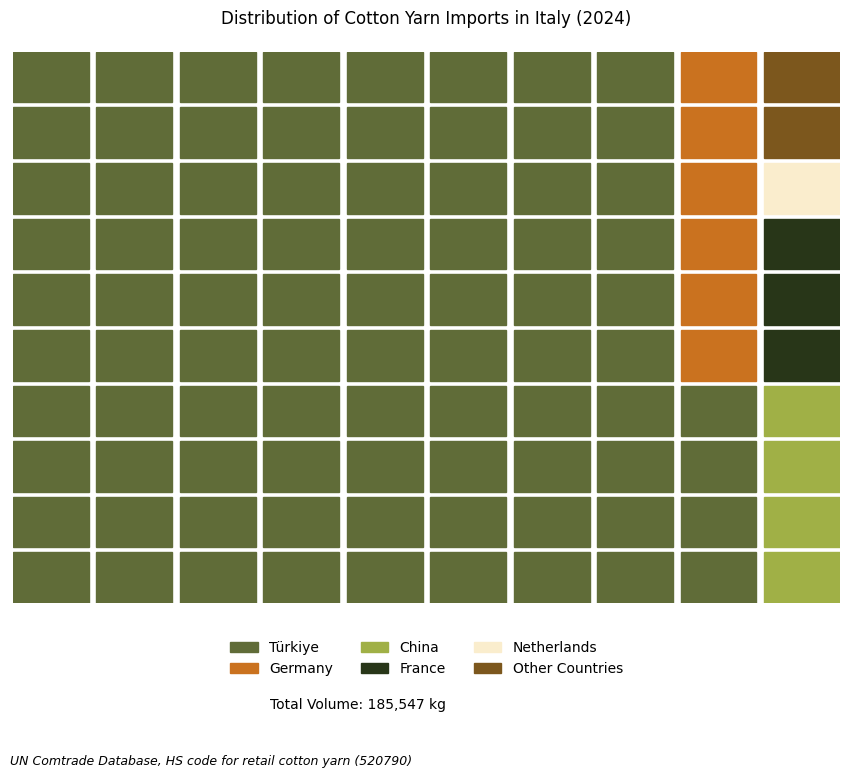

In [60]:
from pywaffle import Waffle
import matplotlib.pyplot as plt

df = df[df["partnerDesc"] != "World"]
country_imports = df.groupby("partnerDesc")["netWgt"].sum().reset_index()
country_imports["percentage"] = (
    country_imports["netWgt"] / country_imports["netWgt"].sum() * 100
).round(1)
country_imports = country_imports.sort_values("percentage", ascending=False)

# top countries
top_n = 5
if len(country_imports) > top_n:
    top_countries = country_imports.iloc[:top_n].copy()
    others = pd.DataFrame(
        {
            "partnerDesc": ["Other Countries"],
            "netWgt": [country_imports.iloc[top_n:]["netWgt"].sum()],
            "percentage": [country_imports.iloc[top_n:]["percentage"].sum()],
        }
    )
    plot_data = pd.concat([top_countries, others], ignore_index=True)
else:
    plot_data = country_imports

# normalize data for a 10x10 waffle
total_weight = plot_data["netWgt"].sum()
plot_data["squares"] = (plot_data["netWgt"] / total_weight * 100).round().astype(int)

difference = 100 - plot_data["squares"].sum()
if difference != 0:
    plot_data.loc[plot_data["squares"].idxmax(), "squares"] += difference

data = dict(zip(plot_data["partnerDesc"], plot_data["squares"]))
colors = [
    "#606c38",
    "#ca721f",
    "#A0B046",
    "#283618",
    "#faedcd",
    "#7c571d",
]

plt.figure(figsize=(10, 8))
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,  # 10x10 grid
    values=data,
    colors=colors,
    title={
        "label": "Distribution of Cotton Yarn Imports in Italy (2024)",
        "loc": "center",
        "pad": 20,
    },
    labels=[f"{k}" for k in data.keys()], 
    legend={
        "loc": "center",
        "bbox_to_anchor": (0.5, -0.1),
        "ncol": 3,  
        "framealpha": 0,
        "fontsize": "medium",
    },
    block_aspect_ratio=1.5,
    interval_ratio_x=0.1,
    interval_ratio_y=0.1,
    figsize=(12, 7),
)



total_volume = f"Total Volume: {int(total_weight):,} kg"
plt.figtext(0.30, -0.02, total_volume, ha="center", fontsize=10)

fig.text(0.01, -0.1, "UN Comtrade Database, HS code for retail cotton yarn (520790)", 
         fontsize=9, style='italic', ha='left')
plt.tight_layout()
plt.show()

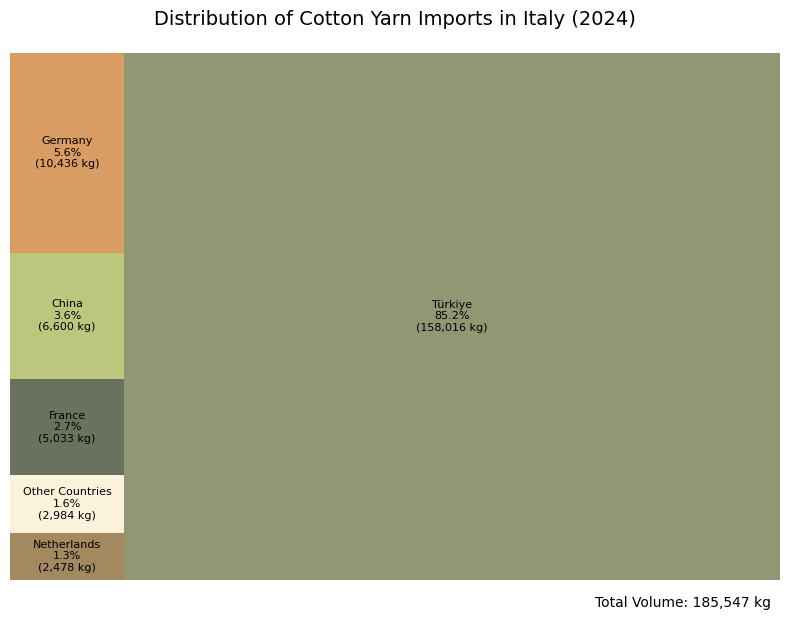

In [61]:
import squarify
import matplotlib.pyplot as plt

plot_data = plot_data.sort_values("netWgt", ascending=True)
plot_data["formatted_label"] = plot_data.apply(
    lambda x: f"{x['partnerDesc']}\n{x['percentage']:.1f}%\n({int(x['netWgt']):,} kg)",
    axis=1,
)

plt.figure(figsize=(8, 6))
squarify.plot(
    sizes=plot_data["netWgt"],
    label=plot_data["formatted_label"],
    color=list(reversed(colors)),
    alpha=0.7,
    text_kwargs={"fontsize": 8, "wrap": True},
)

plt.title("Distribution of Cotton Yarn Imports in Italy (2024)", pad=20, fontsize=14)

total_volume = f"Total Volume: {int(total_weight):,} kg"
plt.figtext(0.75, -0.02, total_volume, ha="left", fontsize=10)
plt.axis("off")
plt.tight_layout()
plt.show()

The yarn that reaches Italian craft shops tells a story: most balls of cotton yarn on sale in Italy in 2024 were spun in Türkiye, distributed through German premium brands, or imported in niche lots from China and France. In this micro-market, proximity and branding outweigh China’s macro dominance, showing how global cotton politics filter down unevenly into cultural and artisanal practice.

Beyond trade flows, what does this yarn actually become in the hands of an artisan? To grasp the scale of material that transforms into a single handmade sweater, we can look at the typical yarn consumption per garment. The next infographic breaks down, how much yarn is needed to craft one sweater: a measure of how fibers translate into wearable craft.

In [62]:
yarn_data = [
    {"weight": "Lace", "grams": (450)},
    {"weight": "DK/Sport", "grams": (550)},
    {"weight": "Worsted/Aran", "grams": (650)},
    {"weight": "Bulk/Chunky", "grams": (750)},
    {"weight": "Bulk/Chunky", "grams": (750)},
]

# considering that every yarn ball is usually 50g
yarn_ball = "🧶"

print("\nYarn Weight Infographic\n" + "=" * 30)

for yarn in yarn_data:
    skeins = yarn["grams"] // 50
    bar = yarn_ball * skeins

    print(f"{yarn['weight']:<15} {bar}  ({skeins} yarn balls)")


Yarn Weight Infographic
Lace            🧶🧶🧶🧶🧶🧶🧶🧶🧶  (9 yarn balls)
DK/Sport        🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶  (11 yarn balls)
Worsted/Aran    🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶  (13 yarn balls)
Bulk/Chunky     🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶  (15 yarn balls)
Bulk/Chunky     🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶🧶  (15 yarn balls)


In [63]:
import numpy as np

avg_sweater_grams = np.mean([yarn["grams"] for yarn in yarn_data])
avg_sweater_kg = avg_sweater_grams / 1000
total_import_tons = total_weight / 1000
sweaters_possible = int(total_weight / avg_sweater_kg)
sweaters_rounded = f"{sweaters_possible:,}"

print(
    f"The average sweater requires {avg_sweater_grams:.0f} grams of yarn.\n\n"
    f"Italy imported {total_import_tons:.1f} tons of cotton yarn in 2024.\n\n"
    f"That's enough to knit approximately {sweaters_possible:,} sweaters!",
)

The average sweater requires 630 grams of yarn.

Italy imported 185.5 tons of cotton yarn in 2024.

That's enough to knit approximately 294,519 sweaters!


A reminder that behind every ball of yarn lies not only global trade routes but also the cultural craft of turning fiber into form.